<a href="https://colab.research.google.com/github/c17h20n4s/MEXA_mental_health_hackathon/blob/main/MEXA_hackathon_promt_CalmCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install the python package for google gen AI
!pip install -q -U google-generativeai

In [2]:
# Import necessary packages and define helper function to render output of models to markdown
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

# Used to securely store your API key
from google.colab import userdata

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import pathlib
import textwrap
import google.generativeai as genai
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [4]:
from google.colab import drive

# Step 1: Mount your Google Drive
drive.mount('/content/drive')

# Step 2: Set the file path based on the folder structure seen in the images
file_path = '/content/drive/My Drive/Colab Notebooks/anon_disorder_musics.csv'

# Step 3: Load the CSV file using pandas
import pandas as pd

df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to verify
print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-4-708bce9e4959>:12: DtypeWarning: Columns (0,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


  Unnamed: 0               artist  \
0          0  Echo & the Bunnymen   
1          1       Paul McCartney   
2          2         Turin Brakes   
3          3         Damon Albarn   
4          4            Radiohead   

                                               lyric  \
0  [Verse 1]\nUnder blue moon I saw you\nSo soon ...   
1                                                NaN   
2  Oooh, oooh, oooh (x2)\nSometimes just letting ...   
3                                                NaN   
4  [Verse 1]\nI sucked the moon\nI spoke too soon...   

                       created_at type  \
0  Wed Jan 13 01:02:45 +0000 2021    P   
1  Wed Jan 13 01:02:45 +0000 2021    P   
2  Wed Jan 13 01:02:45 +0000 2021    P   
3  Wed Jan 13 01:02:45 +0000 2021    P   
4  Wed Jan 13 01:02:45 +0000 2021    P   

                                               title     user_id      src  \
0                                   The Killing Moon  4353e884c1  SPOTIFY   
1           Monkberry Moon Deligh

In [5]:
df.head()

,Unnamed: 0,artist,lyric,created_at,type,title,user_id,src,disorder,Unnamed: 9,...,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161
0,0,Echo & the Bunnymen,[Verse 1]\nUnder blue moon I saw you\nSo soon ...,Wed Jan 13 01:02:45 +0000 2021,P,The Killing Moon,4353e884c1,SPOTIFY,anxiety,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Paul McCartney,NaN,Wed Jan 13 01:02:45 +0000 2021,P,Monkberry Moon Delight - Remastered 2012,4353e884c1,SPOTIFY,anxiety,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Turin Brakes,"Oooh, oooh, oooh (x2)\nSometimes just letting ...",Wed Jan 13 01:02:45 +0000 2021,P,Red Moon,4353e884c1,SPOTIFY,anxiety,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Damon Albarn,NaN,Wed Jan 13 01:02:45 +0000 2021,P,"Damon Albarn: Dr Dee, An English Opera: No. 4,...",4353e884c1,SPOTIFY,anxiety,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Radiohead,[Verse 1]\nI sucked the moon\nI spoke too soon...,Wed Jan 13 01:02:45 +0000 2021,P,Sail To The Moon,4353e884c1,SPOTIFY,anxiety,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print(df.shape)

(419385, 162)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419385 entries, 0 to 419384
Columns: 162 entries, Unnamed: 0 to Unnamed: 161
dtypes: object(162)
memory usage: 518.3+ MB


In [8]:
# Dropping columns that are unnamed or irrelevant for the analysis
df_cleaned = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [9]:
# We cannot analyze lyrics that are NaN, so drop rows where 'lyric' is NaN
df_cleaned = df_cleaned.dropna(subset=['lyric'])

In [10]:
# Strip whitespaces and converting lyrics to lowercase
df_cleaned['lyric'] = df_cleaned['lyric'].str.strip().str.lower()

In [11]:
print(df_cleaned.head())

                artist                                              lyric  \
0  Echo & the Bunnymen  [verse 1]\nunder blue moon i saw you\nso soon ...   
2         Turin Brakes  oooh, oooh, oooh (x2)\nsometimes just letting ...   
4            Radiohead  [verse 1]\ni sucked the moon\ni spoke too soon...   
5                Peace  [verse 1]\nif you call it lonely to be so alon...   
6              Karen O  [verse 1: karen o, \nezra koenig\n & \nboth\n]...   

                       created_at type                                title  \
0  Wed Jan 13 01:02:45 +0000 2021    P                     The Killing Moon   
2  Wed Jan 13 01:02:45 +0000 2021    P                             Red Moon   
4  Wed Jan 13 01:02:45 +0000 2021    P                     Sail To The Moon   
5  Wed Jan 13 01:02:45 +0000 2021    P                       Under the Moon   
6  Wed Jan 13 01:02:45 +0000 2021    P  The Moon Song - Studio Version Duet   

      user_id      src disorder  
0  4353e884c1  SPOTIFY  anxi

In [12]:
# Strip whitespaces and convert to lowercase to ensure consistency
df_cleaned['disorder'] = df_cleaned['disorder'].str.strip().str.lower()

# Filter out rows with unexpected values in the 'disorder' column
expected_disorders = ['anxiety', 'depression', 'ptsd', 'bipolar']  # Add more as needed
df_cleaned = df_cleaned[df_cleaned['disorder'].isin(expected_disorders)]


Short EDA

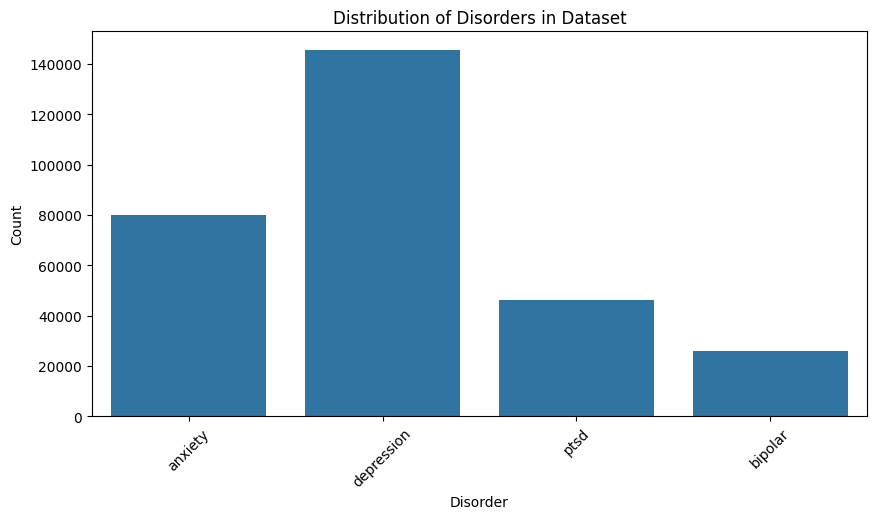

In [13]:
# Plot the distribution of disorders
plt.figure(figsize=(10, 5))
sns.countplot(x='disorder', data=df_cleaned, order=expected_disorders)
plt.title('Distribution of Disorders in Dataset')
plt.xticks(rotation=45)
plt.xlabel('Disorder')
plt.ylabel('Count')
plt.show()

In [14]:
print("Data Summary:")
print(df_cleaned.describe())
print("\n")
print(df_cleaned.info())

Data Summary:
        artist                                              lyric  \
count   297987                                             298022   
unique   20732                                             115063   
top        BTS  [verse 1]\ni just cried into a shirt i could n...   
freq     10890                                               1494   

                            created_at    type           title     user_id  \
count                           298022  298022          298022      298022   
unique                           34857       3           84917        4261   
top     Mon Mar 30 21:35:00 +0000 2020       P  Lowkey As Hell  eeb72fcca6   
freq                               624  193114            2862        4698   

            src    disorder  
count    298022      298022  
unique        3           4  
top     SPOTIFY  depression  
freq     235111      145685  


<class 'pandas.core.frame.DataFrame'>
Index: 298022 entries, 0 to 419384
Data columns (total 8 co

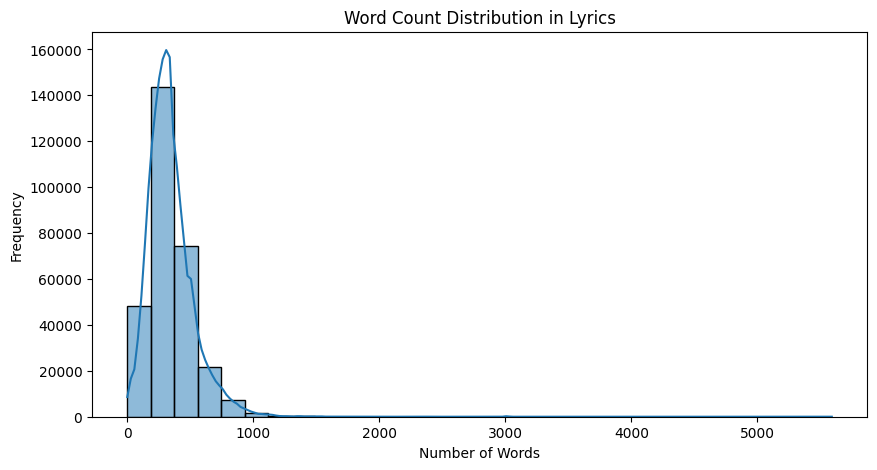

In [15]:
# Word Count Analysis of Lyrics
df_cleaned['word_count'] = df_cleaned['lyric'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['word_count'], bins=30, kde=True)
plt.title('Word Count Distribution in Lyrics')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

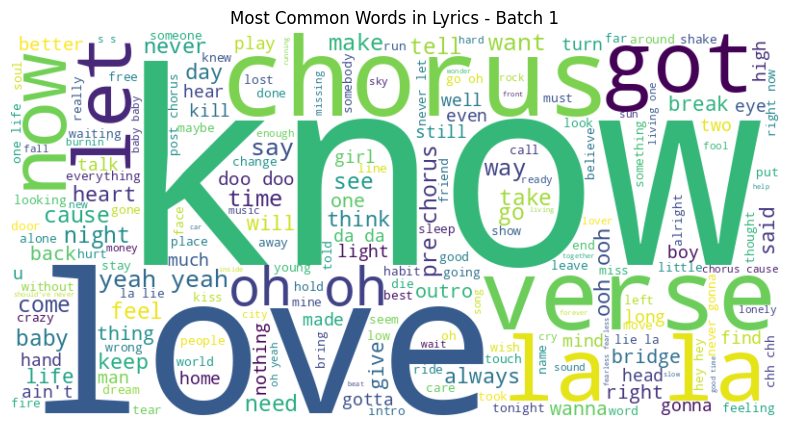

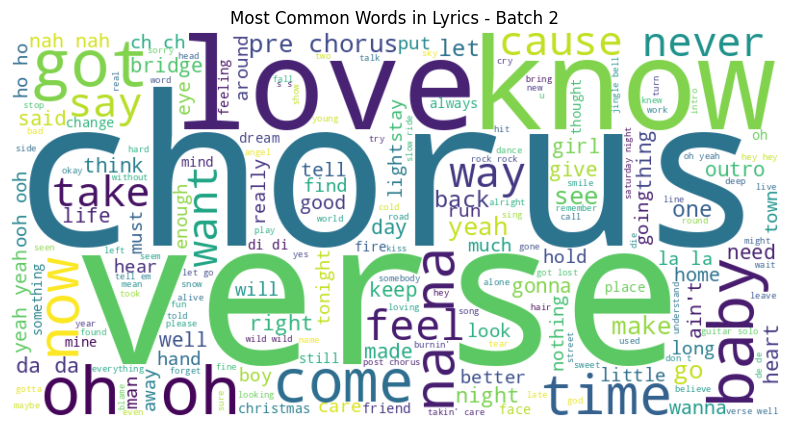

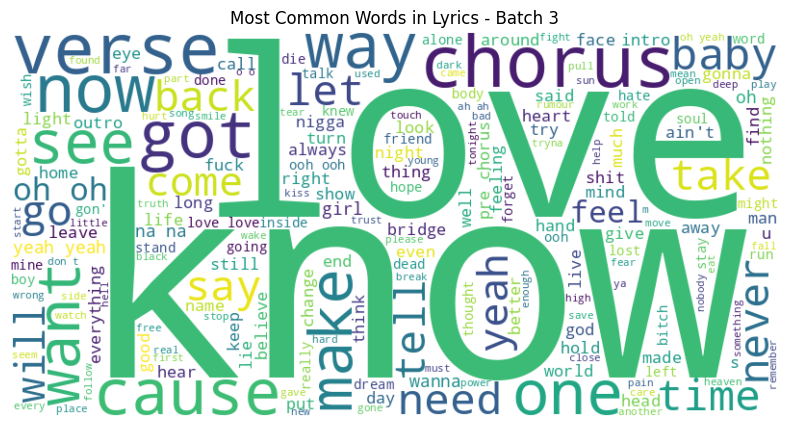

In [16]:
batch_size = 500
batches = [df_cleaned['lyric'][i:i+batch_size] for i in range(0, len(df_cleaned), batch_size)]

for i, batch in enumerate(batches[:3]):  # Adjust how many batches you want to visualize
    batch_lyrics = ' '.join(batch)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(batch_lyrics)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Most Common Words in Lyrics - Batch {i+1}')
    plt.show()


**GEMINI START**

In [17]:
# Grab API Key from your secrets, add it to secrets if its not there (on the left hand panel)
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

# Configure genai to use your API Key
genai.configure(api_key=GOOGLE_API_KEY)

In [18]:
# List the available gemini models
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-pro-exp-0801
models/gemini-1.5-pro-exp-0827
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-exp-0827
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/learnlm-1.5-pro-experimental
models/gemini-exp-1114
models/gemini-exp-1121


In [19]:
# Select a model and instantiate a GenerativeModel
model = genai.GenerativeModel('gemini-1.5-pro')

In [36]:
import time

def analyze_lyrics_sentiment_with_gemini(lyric, disorder):
    # Shorten the lyric if it's too long
    if len(lyric) > 500:
        lyric = lyric[:500] + "..."

    prompt = (
        f"Analyze the following song lyrics in the context of {disorder}:\n\n"
        f"\"{lyric}\"\n\n"
        "Describe the emotional tone of these lyrics, any significant themes, "
        "and how these themes may relate to mental health conditions like depression, anxiety, PTSD, or bipolar disorder."
    )

    try:
        # Generate content using the Gemini model instance
        response = model.generate_content(prompt)

        # Print the whole response to see its structure
        print("Full Gemini response:", response)

        # Check if response contains text and return it
        if response and hasattr(response, 'text'):
            return response.text
        else:
            return "No 'text' field found in response from Gemini"
    except Exception as e:
        return f"Error generating response: {e}"

In [37]:
sentiments = []
for index, row in df_cleaned.head(1).iterrows():
    lyric = row['lyric']
    disorder = row['disorder']
    response_text = analyze_lyrics_sentiment_with_gemini(lyric, disorder)
    sentiments.append({'lyric': lyric, 'disorder': disorder, 'gemini_analysis': response_text})

sentiment_df = pd.DataFrame(sentiments)
print(sentiment_df[['disorder', 'gemini_analysis']])

Full Gemini response: response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "The lyrics evoke a strong sense of **foreboding and helplessness** in the face of an inevitable, unwanted event.  The emotional tone is **resignation mixed with dread**.  Several themes emerge that resonate with anxiety and related mental health conditions:\n\n* **Lack of control/Powerlessness:** The recurring motif of \"fate\" and being \"up against your will\" highlights a lack of agency. The speaker feels trapped and unable to prevent something from happening, despite knowing it will be painful (\"too late to beg you or cancel it\"). This powerlessness is a core feature of anxiety disorders, where individuals often feel overwhelmed by uncontrollable worries and fears.  This can also be a symptom of PTSD, where traumatic memories intr

In [38]:
def extract_sentiment_from_gemini_response(response_text):
    response_text = response_text.lower()
    if "positive" in response_text or "hopeful" in response_text or "uplifting" in response_text or "good" in response_text:
        return 1  # Positive sentiment
    elif "negative" in response_text or "despair" in response_text or "down" in response_text or "bad" in response_text or "foreboding" in response_text:
        return -1  # Negative sentiment
    elif "neutral" in response_text or "indifferent" in response_text or "mixed" in response_text:
        return 0  # Neutral sentiment
    else:
        # Optionally print or log to understand why it couldn't extract a score
        print(f"Unable to determine sentiment for: {response_text[:100]}...")
        return None  # Unable to determine sentiment


In [39]:
sentiment_df['sentiment_score'] = sentiment_df['gemini_analysis'].apply(extract_sentiment_from_gemini_response)
sentiment_df_cleaned = sentiment_df.dropna(subset=['sentiment_score'])

In [40]:
print("Unique disorders in cleaned dataset:", sentiment_df_cleaned['disorder'].unique())

Unique disorders in cleaned dataset: ['anxiety']


<ipython-input-41-8c26594e7050>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_sentiment.index, y=average_sentiment.values, palette='viridis')


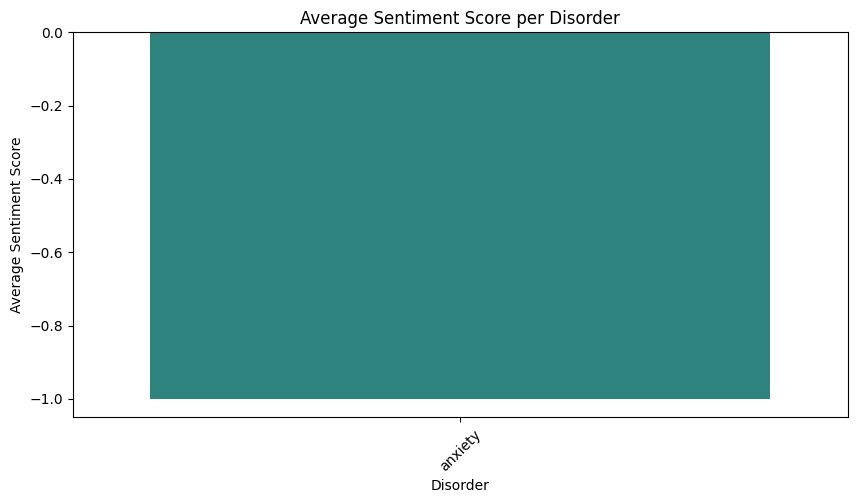

In [41]:
average_sentiment = sentiment_df_cleaned.groupby('disorder')['sentiment_score'].mean()

# Plotting the average sentiment score for each disorder
plt.figure(figsize=(10, 5))
sns.barplot(x=average_sentiment.index, y=average_sentiment.values, palette='viridis')
plt.title('Average Sentiment Score per Disorder')
plt.xlabel('Disorder')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.show()
